<a id='top'> </a>
Author: [James Bourbeau](http://www.jamesbourbeau.com)

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

last updated: 2017-03-13 

CPython 2.7.10
IPython 5.3.0

numpy 1.12.0
matplotlib 2.0.0
scipy 0.15.1
pandas 0.19.2
sklearn 0.18.1
mlxtend 0.5.1


In [2]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

import composition as comp
import composition.analysis.plotting as plotting
    
color_dict = comp.analysis.get_color_dict()


/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_sim = comp.load_dataframe(datatype='sim')

sim quality cut event flow:
             IceTopQualityCuts:    1.0    1.0
         lap_InIce_containment:  0.776  0.776
              InIceQualityCuts:  0.786   0.75
                 num_hits_1_60:  0.999   0.75




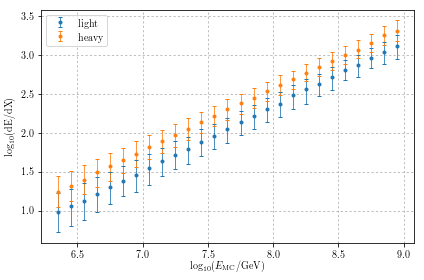

In [18]:
energybins = comp.analysis.get_energybins()
fig, ax = plt.subplots()
light_mask = df_sim['MC_comp_class'] == 'light'
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].MC_log_energy.values,
                                                            df_sim[light_mask].log_dEdX.values,
                                                            energybins.log_energy_bins)
heavy_mask = df_sim['MC_comp_class'] == 'heavy'
bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].MC_log_energy.values,
                                                            df_sim[heavy_mask].log_dEdX.values,
                                                            energybins.log_energy_bins)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('$\log_{10}(\mathrm{dE/dX})$')
ax.grid()
ax.legend()
plt.show()

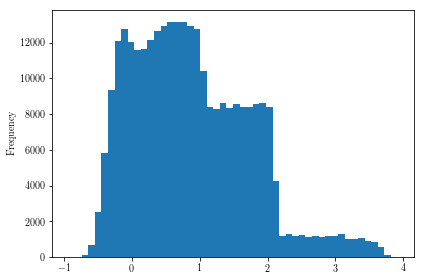

In [20]:
df_sim.log_s125.plot(kind='hist', bins=50)

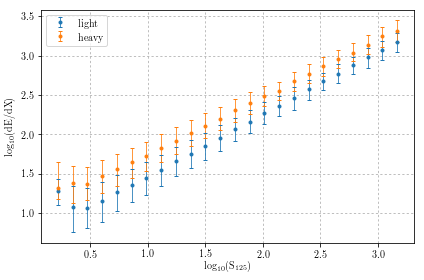

In [26]:
s125_bins = np.linspace(-1, 4, 40)
fig, ax = plt.subplots()
light_mask = (df_sim['MC_comp_class'] == 'light') & (df_sim['lap_log_energy'] > 6.4) & (df_sim['lap_log_energy'] < 9.0)
bin_centers, bin_medians_light, error_light = comp.analysis.get_medians(df_sim[light_mask].log_s125.values,
                                                            df_sim[light_mask].log_dEdX.values,
                                                            s125_bins)
heavy_mask = (df_sim['MC_comp_class'] == 'heavy') & (df_sim['lap_log_energy'] > 6.4) & (df_sim['lap_log_energy'] < 9.0)
bin_centers, bin_medians_heavy, error_heavy = comp.analysis.get_medians(df_sim[heavy_mask].log_s125.values,
                                                            df_sim[heavy_mask].log_dEdX.values,
                                                            s125_bins)

ax.errorbar(bin_centers, bin_medians_light, yerr=error_light, label='light', ls='None', marker='.')
ax.errorbar(bin_centers, bin_medians_heavy, yerr=error_heavy, label='heavy', ls='None', marker='.')
ax.set_xlabel('$\log_{10}(\mathrm{S_{125}})$')
ax.set_ylabel('$\log_{10}(\mathrm{dE/dX})$')
ax.grid()
ax.legend()
plt.savefig('/home/jbourbeau/public_html/figures/energyloss-vs-s125-dist.png')
plt.show()

1_60
1_45
1_30
1_6


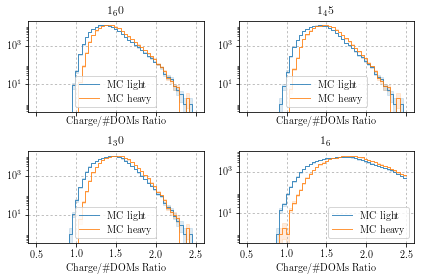

In [7]:
fig, ax = plt.subplots(2, 2, sharex=True)

for i, ax in zip(['1_60', '1_45', '1_30', '1_6'], ax.flatten()):
    print(i)
    ratio = df_sim['InIce_log_charge_'+i]/df_sim['log_NChannels_'+i]
    ratio = ratio.values
    ratio_bins = np.linspace(0.5, 2.5, 50)
    ratio_midpoints = (ratio_bins[1:] + ratio_bins[:-1]) / 2

    nchannels_mask = (df_sim['NChannels_'+i] >= 8).values
    light_mask = (df_sim.MC_comp_class == 'light').values
    heavy_mask = (df_sim.MC_comp_class == 'heavy').values

    light_counts = np.histogram(ratio[light_mask & nchannels_mask], ratio_bins)[0]
    heavy_counts = np.histogram(ratio[heavy_mask & nchannels_mask], ratio_bins)[0]

    plotting.plot_steps(ratio_midpoints, light_counts, np.sqrt(light_counts), ax, 'C0', 'MC light')
    plotting.plot_steps(ratio_midpoints, heavy_counts, np.sqrt(heavy_counts), ax, 'C1', 'MC heavy')
    ax.set_xlabel('Charge/\#DOMs Ratio')
    ax.set_title(i)
    ax.set_yscale("log", nonposy='clip')
    ax.grid()
    ax.legend()
plt.show()

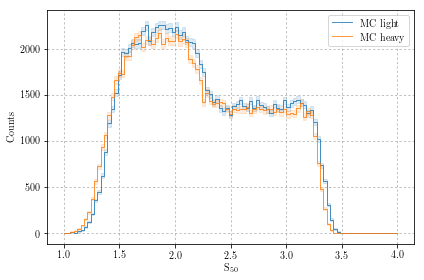

In [27]:
fig, ax = plt.subplots()

s50 = df_sim['log_s50'].values
s50_bins = np.linspace(1, 4, 100)
s50_midpoints = (s50_bins[1:] + s50_bins[:-1]) / 2

light_mask = (df_sim.MC_comp_class == 'light').values
heavy_mask = (df_sim.MC_comp_class == 'heavy').values

light_counts = np.histogram(s50[light_mask], s50_bins)[0]
heavy_counts = np.histogram(s50[heavy_mask], s50_bins)[0]

plotting.plot_steps(s50_midpoints, light_counts, np.sqrt(light_counts), ax, 'C0', 'MC light')
plotting.plot_steps(s50_midpoints, heavy_counts, np.sqrt(heavy_counts), ax, 'C1', 'MC heavy')
ax.set_xlabel('$\mathrm{S}_{50}$')
ax.set_ylabel('Counts')
# ax.set_yscale("log", nonposy='clip')
ax.grid()
ax.legend()
plt.show()

In [22]:
df_sim.columns.values

array(['IceTopMaxSignal', 'IceTopMaxSignalInEdge', 'IceTopMaxSignalString',
       'IceTopNeighbourMaxSignal', 'IceTopQualityCuts',
       'IceTop_FractionContainment', 'InIceQualityCuts',
       'InIce_FractionContainment', 'InIce_charge_1_15',
       'InIce_charge_1_30', 'InIce_charge_1_45', 'InIce_charge_1_6',
       'InIce_charge_1_60', 'InIce_charge_45_60',
       'Laputop_IceTop_FractionContainment',
       'Laputop_InIce_FractionContainment', 'MC_azimuth', 'MC_comp',
       'MC_comp_class', 'MC_energy', 'MC_type', 'MC_x', 'MC_y',
       'MC_zenith', 'NChannels_1_15', 'NChannels_1_30', 'NChannels_1_45',
       'NChannels_1_6', 'NChannels_1_60', 'NChannels_45_60', 'NHits_1_15',
       'NHits_1_30', 'NHits_1_45', 'NHits_1_6', 'NHits_1_60',
       'NHits_45_60', 'NStations', 'StationDensity', 'eloss_1500_standard',
       'eloss_1500_strong', 'end_time_mjd', 'lap_beta', 'lap_chi2',
       'lap_energy', 'lap_fitstatus_ok', 'lap_ndf', 'lap_rlogl',
       'lap_s125', 'lap_s180', 'lap_s

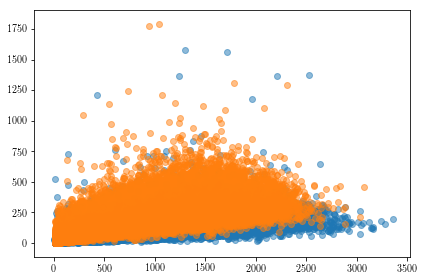

In [25]:
fig, ax = plt.subplots()
ax.scatter(df_sim[df_sim.MC_comp_class == 'light']['lap_s50'],
          df_sim[df_sim.MC_comp_class == 'light']['eloss_1500_standard'],
          label='MC light', alpha=0.5)
ax.scatter(df_sim[df_sim.MC_comp_class == 'heavy']['lap_s50'],
          df_sim[df_sim.MC_comp_class == 'heavy']['eloss_1500_standard'],
          label='MC heavy', alpha=0.5)
plt.show()